# Pair programming Estandarización

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

In [31]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None # recordamos que este comando nos pe


### 1. Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.

In [32]:
#importamos el df. 
# no importamos el del pair anterior ya que no podemos normalizar la variable y nos da muchos problemas:
df = pd.read_csv('../datos/diamonds_1.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [33]:
#iniciamos el método StandardScaler:

scaler = StandardScaler()

In [34]:
#generamos un df con las variables numéricas:

numericas = df.select_dtypes(include=np.number)
numericas.head(3)

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,61.8,65.0,327,4.05,4.07,2.31


In [35]:
# exploramos los estadísticos principales de las variables numéricas:

numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.789085,0.456638,0.20,0.40,0.70,1.04,2.32
depth,53794.0,61.748024,1.219635,58.00,61.10,61.80,62.50,65.50
table,53794.0,57.424622,2.152493,50.00,56.00,57.00,59.00,65.00
price,53794.0,3387.509276,3103.757084,326.00,951.00,2401.00,4785.00,14074.00
lenght_mm,53794.0,5.731778,1.118409,3.73,4.71,5.70,6.54,10.14
width_mm,53794.0,5.733727,1.110444,3.68,4.72,5.71,6.54,10.16
depth_mm,53794.0,3.539069,0.690341,1.07,2.91,3.53,4.03,6.27


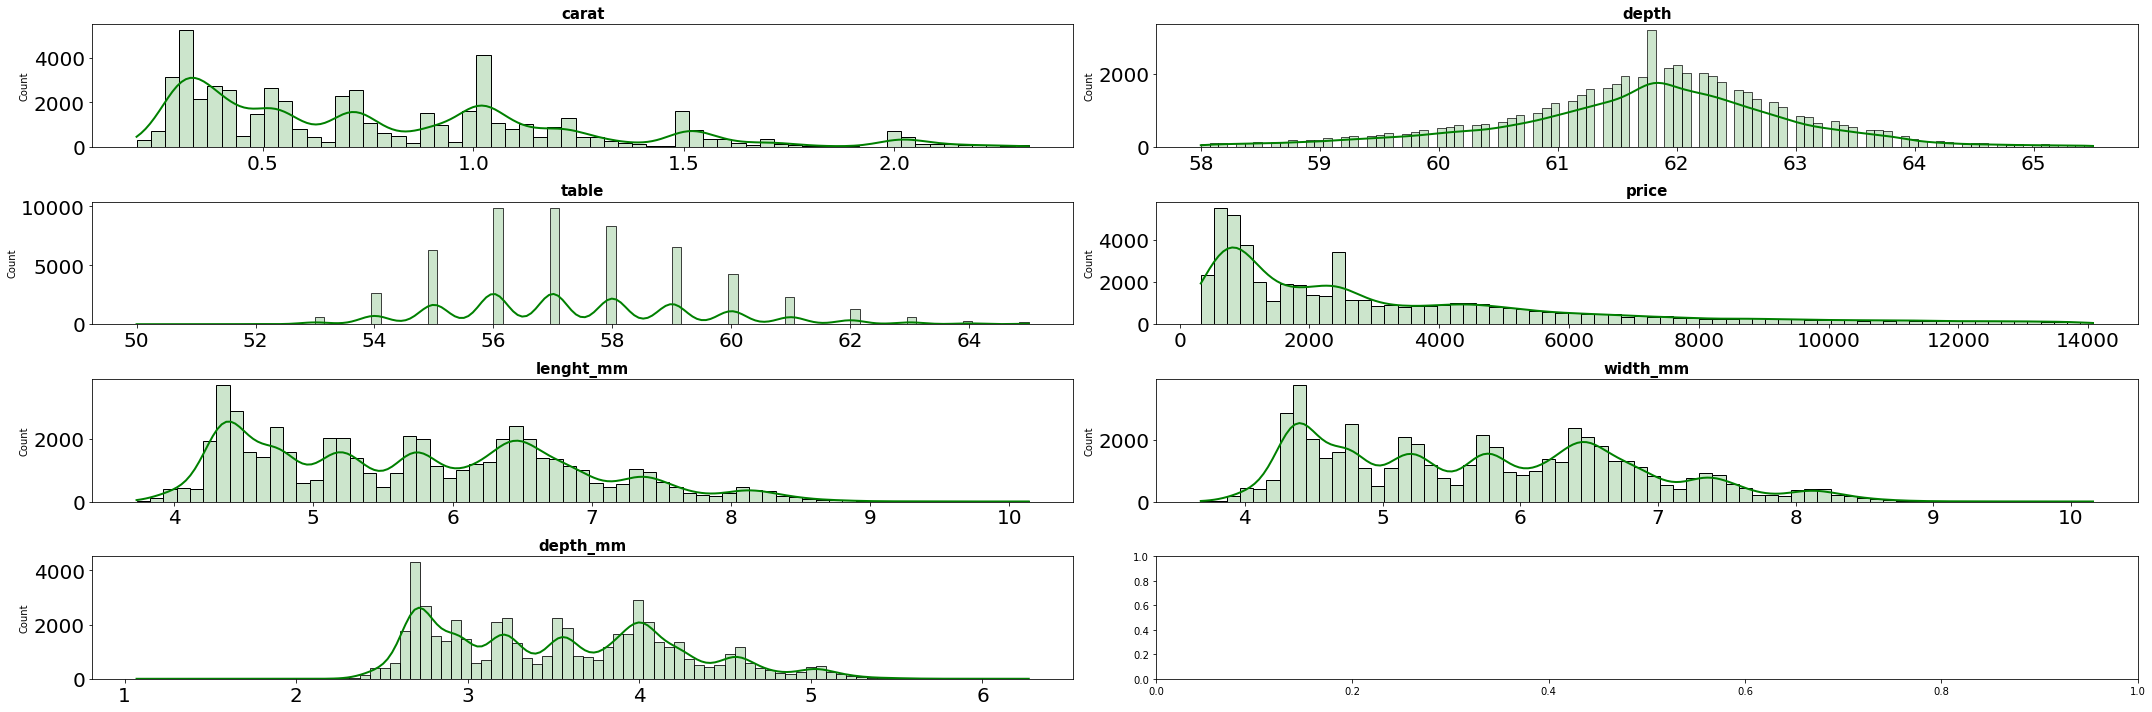

In [36]:
#representación gráfica de la distribución ANTES:

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))

axes = axes.flat

for i, col in enumerate(numericas): 
    sns.histplot(
        data = numericas,
        x = col,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2,
        color='green', 
        ax = axes[i])
    
    
    axes[i].set_title(col, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

In [37]:
#aplicamos el método StandardScaler y volcamos este ajuste y transformación en un df:
numericas_est = pd.DataFrame(scaler.fit_transform(numericas), columns=numericas.columns)
numericas_est.head()

,carat,depth,table,price,lenght_mm,width_mm,depth_mm
0,-1.224362,-0.203361,-1.126435,-0.986397,-1.593151,-1.579317,-1.606567
1,-1.268160,-1.597233,1.661056,-0.986397,-1.646799,-1.705394,-1.780396
2,-1.224362,0.042616,3.519383,-0.986075,-1.503737,-1.498268,-1.780396
3,-1.092965,0.534571,0.267310,-0.983820,-1.369617,-1.354180,-1.316852
4,-1.049167,1.272504,0.267310,-0.983498,-1.244438,-1.246114,-1.143024


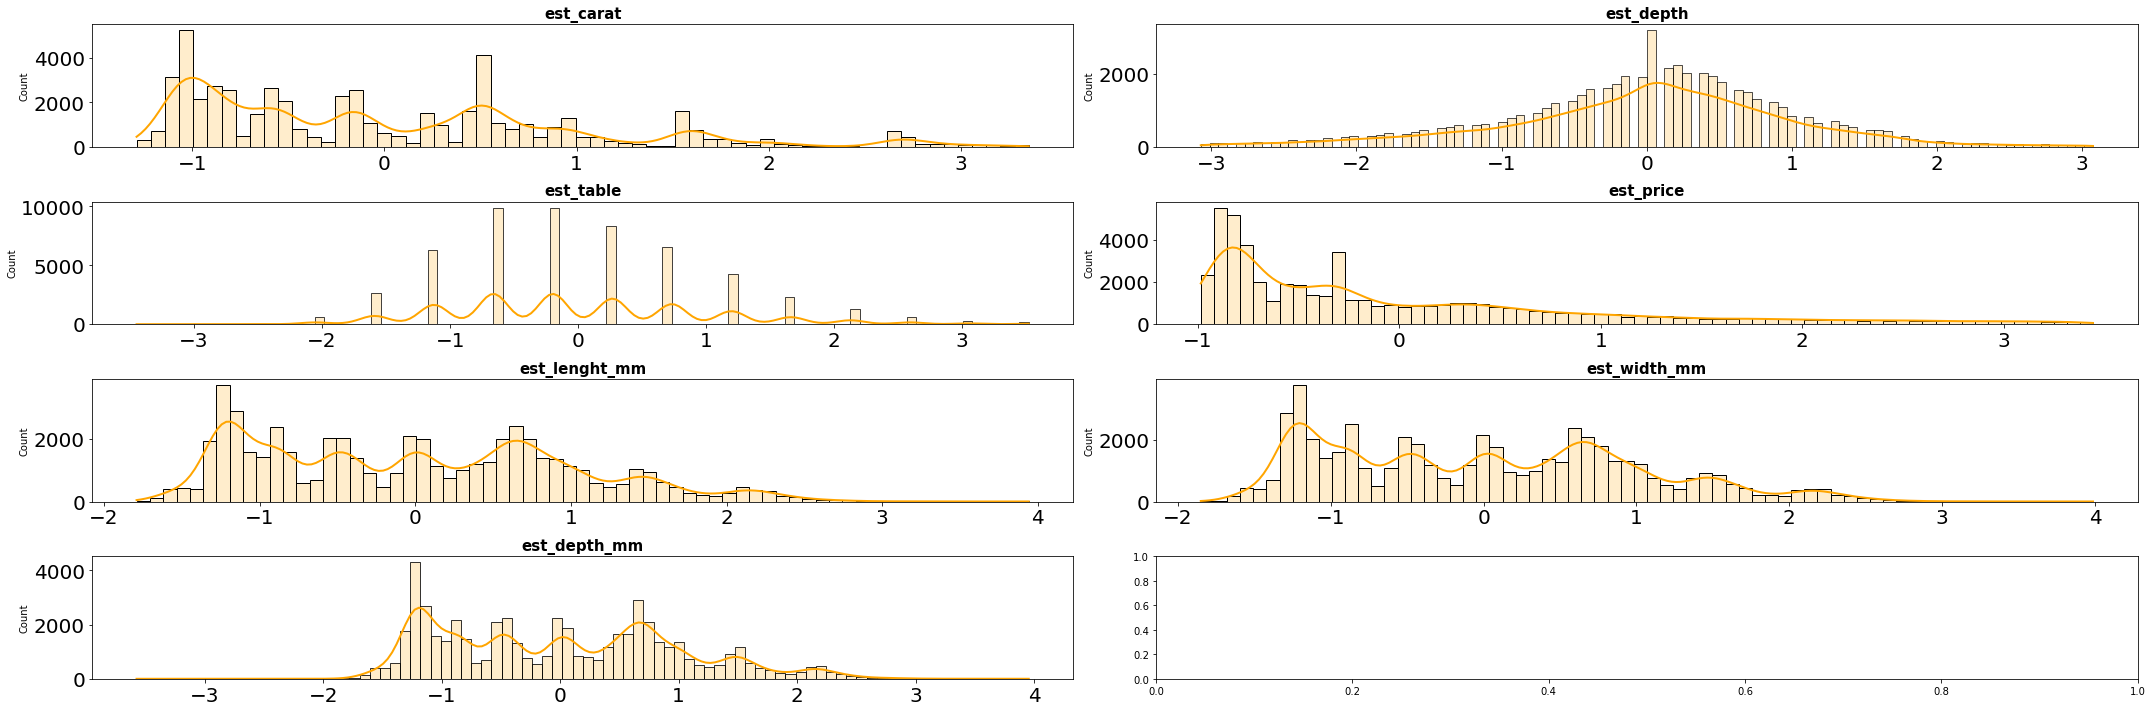

In [45]:
#representación gráfica de la distribución DESPUÉS:

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (30, 10))

columnas_est = numericas_est.columns
axes = axes.flat


for i, col in enumerate(columnas_est): 
    sns.histplot(
        data = numericas_est,
        x = col,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2,
        color='orange', 
        ax = axes[i])
    
    
    axes[i].set_title(col, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

In [39]:
#vamos a guardar estos datos en nuevas columnas. para ello:

#creamos una lista donde almacenaremos los nombres
nombres_cols = []

#generaremos un bucle for para añadirle 'est' a los nombres antiguos:

for col in numericas_est.columns:
    nombres_cols.append('est_' + col)

#reemplazaremos estos nombres en el df de las numéricas estandarizadas
numericas_est.columns = nombres_cols

#comprobamos el cambio:
numericas_est.columns

Index(['est_carat', 'est_depth', 'est_table', 'est_price', 'est_lenght_mm',
       'est_width_mm', 'est_depth_mm'],
      dtype='object')

In [43]:
#creamos las nuevas columnas con los valores estandarizamos en el df:
df[numericas_est.columns] = numericas_est

#comprobamos:

df.head(3)

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm,est_carat,est_depth,est_table,est_price,est_lenght_mm,est_width_mm,est_depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.268160,-1.597233,1.661056,-0.986397,-1.646799,-1.705394,-1.780396
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.224362,0.042616,3.519383,-0.986075,-1.503737,-1.498268,-1.780396
3,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31,-1.092965,0.534571,0.267310,-0.983820,-1.369617,-1.354180,-1.316852


### 2. Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [44]:
df.to_csv('../datos/diamonds_est.csv')